In [1]:
import cv2
import numpy as np

In [7]:
def detect_color(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the red color in HSV
    lower_red_1 = np.array([0, 70, 50])
    upper_red_1 = np.array([10, 255, 255])
    lower_red_2 = np.array([170, 70, 50])
    upper_red_2 = np.array([180, 255, 255])

    # Create masks for the two red ranges
    mask1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(hsv, lower_red_2, upper_red_2)

    # Combine the masks
    mask = cv2.bitwise_or(mask1, mask2)

    # Extract the red regions
    extracted_pixels = cv2.bitwise_and(image, image, mask=mask)

    return extracted_pixels

In [12]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size)) # size = h in real and size *aspect_ratio = w
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

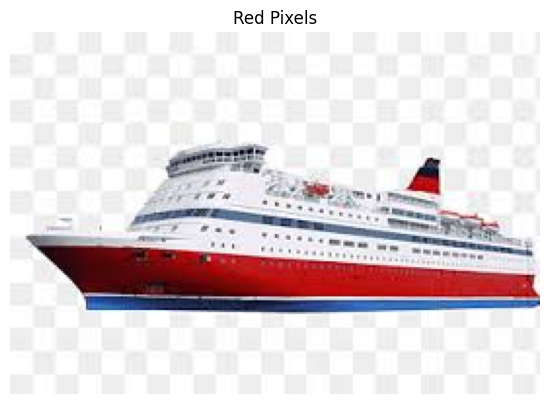

In [14]:
image = cv2.imread("/content/drive/MyDrive/images/ship.jpg")
imshow("Red Pixels", image)

In [15]:
# for blue color

def detect_color(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the blue color in HSV
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])

    # Create a mask for the blue range
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Extract the blue regions
    extracted_pixels = cv2.bitwise_and(image, image, mask=mask)

    return extracted_pixels

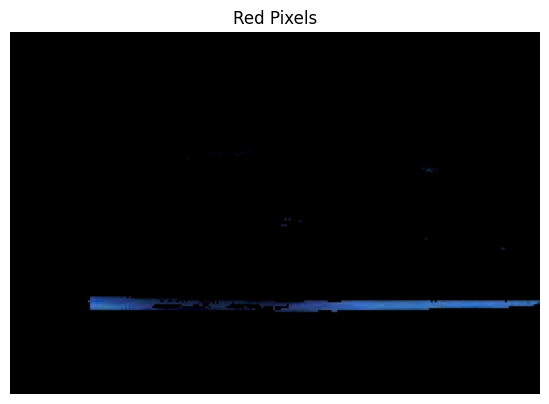

In [16]:
red_pixels = detect_color(image)
imshow("Red Pixels", red_pixels)